<a href="https://colab.research.google.com/github/wangjuan001/sandbox2019/blob/master/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy

def exampleCost(xc, yc):
    ''' Cost function: 2 to match, -6 to gap, -4 to mismatch '''
    if xc == yc: return 2 # match
    if xc == '-' or yc == '-': return -6 # gap
    return -4

def smithWaterman(x, y, s):
    ''' Calculate local alignment values of sequences x and y using
        dynamic programming.  Return maximal local alignment value. '''
    V = numpy.zeros((len(x)+1, len(y)+1), dtype=int)
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            V[i, j] = max(V[i-1, j-1] + s(x[i-1], y[j-1]), # diagonal
                          V[i-1, j  ] + s(x[i-1], '-'),    # vertical
                          V[i  , j-1] + s('-',    y[j-1]), # horizontal
                          0)                               # empty
    argmax = numpy.where(V == V.max())
    return V, int(V[argmax])
    
def traceback(V, x, y, s):
    """ Trace back from given cell in local-alignment matrix V """
    # get i, j for maximal cell
    i, j = numpy.unravel_index(numpy.argmax(V), V.shape)
    xscript, alx, aly, alm = [], [], [], []
    while (i > 0 or j > 0) and V[i, j] != 0:
        diag, vert, horz = 0, 0, 0
        if i > 0 and j > 0:
            diag = V[i-1, j-1] + s(x[i-1], y[j-1])
        if i > 0:
            vert = V[i-1, j] + s(x[i-1], '-')
        if j > 0:
            horz = V[i, j-1] + s('-', y[j-1])
        if diag >= vert and diag >= horz:
            match = x[i-1] == y[j-1]
            xscript.append('M' if match else 'R')
            alm.append('|' if match else ' ')
            alx.append(x[i-1]); aly.append(y[j-1])
            i -= 1; j -= 1
        elif vert >= horz:
            xscript.append('D')
            alx.append(x[i-1]); aly.append('-'); alm.append(' ')
            i -= 1
        else:
            xscript.append('I')
            aly.append(y[j-1]); alx.append('-'); alm.append(' ')
            j -= 1
    xscript = (''.join(xscript))[::-1]
    alignment = '\n'.join(map(lambda x: ''.join(x), [alx[::-1], alm[::-1], aly[::-1]]))
    return xscript, alignment

x, y = 'GGTATGCTGGCGCTA', 'TATATGCGGCGTTT'
V, best = smithWaterman(x, y, exampleCost)
print(V)
print("Best score=%d, in cell %s" % (best, numpy.unravel_index(numpy.argmax(V), V.shape)))
print(traceback(V, x, y, exampleCost)[1])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  2  2  0  2  0  0  0]
 [ 0  0  0  0  0  0  2  0  2  4  0  2  0  0  0]
 [ 0  2  0  2  0  2  0  0  0  0  0  0  4  2  2]
 [ 0  0  4  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  6  0  6  0  0  0  0  0  0  2  2  2]
 [ 0  0  0  0  2  0  8  2  2  2  0  2  0  0  0]
 [ 0  0  0  0  0  0  2 10  4  0  4  0  0  0  0]
 [ 0  2  0  2  0  2  0  4  6  0  0  0  2  2  2]
 [ 0  0  0  0  0  0  4  0  6  8  2  2  0  0  0]
 [ 0  0  0  0  0  0  2  0  2  8  4  4  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  2 10  4  0  0  0]
 [ 0  0  0  0  0  0  2  0  6  2  4 12  6  0  0]
 [ 0  0  0  0  0  0  0  4  0  2  4  6  8  2  0]
 [ 0  2  0  2  0  2  0  0  0  0  0  0  8 10  4]
 [ 0  0  4  0  4  0  0  0  0  0  0  0  2  4  6]]
Best score=12, in cell (12, 11)
TATGCTGGCG
||||| ||||
TATGC-GGCG


In [0]:
import seaborn as sns

In [0]:
sns.set()

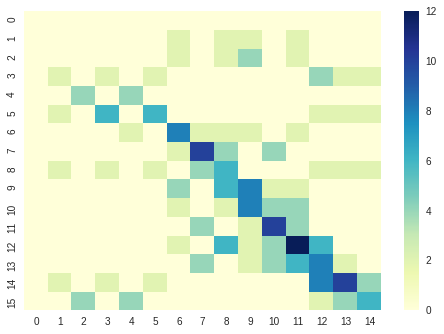

In [65]:
ax = sns.heatmap(V,cmap="YlGnBu")

In [70]:
!pip3 install toyplot

    100% |████████████████████████████████| 276kB 7.8MB/s 
    100% |████████████████████████████████| 296kB 9.5MB/s 
    100% |████████████████████████████████| 2.6MB 10.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/ce/69/27/b509a1aa85c66c29151f96f868d800f8c7cc280c39922df721
  Stored in directory: /root/.cache/pip/wheels/16/de/95/9773e4928c7cdd05d0e782158bf1352c7800e51dc4479ef982
  Stored in directory: /root/.cache/pip/wheels/a4/cd/54/c1d0803dfed5adf2bba530eda161581d9096d0154aee082cac
Successfully built toyplot custom-inherit pypng


In [0]:
import toyplot

In [91]:
colormap = toyplot.color.brewer.map("BlueGreenYellow", domain_min=12, domain_max=0)
print(colormap)


In [92]:
toyplot.matrix((V,colormap), label="A matrix",colorshow=True)

(<toyplot.canvas.Canvas at 0x7f7802664358>,
 <toyplot.coordinates.Table at 0x7f780269c0f0>)

<svg class="toyplot-canvas-Canvas" height="600px" id="tf930f823f3fc447f87ffdb06136692b1" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600 600" width="600px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> A matrix 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 0 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 1 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 0.000000 2.000000 2.000000 0.000000 2.000000 0.000000 0.000000 0.000000 2 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 0.000000 2.000000 4.000000 0.000000 2.000000 0.000000 0.000000 0.000000 3 0.000000 2.000000 0.000000 2.000000 0.000000 2.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 4.000000 2.000000 2.000000 4 0.000000 0.000000 4.000000 0.000000 4.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5 0.000000 2.000000 0.000000 6.000000 0.000000 6.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 2.000000 2.000000 6 0.000000 0.000000 0.000000 0.000000 2.000000 0.000000 8.000000 2.000000 2.000000 2.000000 0.000000 2.000000 0.000000 0.000000 0.000000 7 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 10.000000 4.000000 0.000000 4.000000 0.000000 0.000000 0.000000 0.000000 8 0.000000 2.000000 0.000000 2.000000 0.000000 2.000000 0.000000 4.000000 6.000000 0.000000 0.000000 0.000000 2.000000 2.000000 2.000000 9 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 4.000000 0.000000 6.000000 8.000000 2.000000 2.000000 0.000000 0.000000 0.000000 10 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 0.000000 2.000000 8.000000 4.000000 4.000000 0.000000 0.000000 0.000000 11 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 4.000000 0.000000 2.000000 10.000000 4.000000 0.000000 0.000000 0.000000 12 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 0.000000 6.000000 2.000000 4.000000 12.000000 6.000000 0.000000 0.000000 13 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 4.000000 0.000000 2.000000 4.000000 6.000000 8.000000 2.000000 0.000000 14 0.000000 2.000000 0.000000 2.000000 0.000000 2.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 8.000000 10.000000 4.000000 15 0.000000 0.000000 4.000000 0.000000 4.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 4.000000 6.000000 0 4 8 12